# Exploring the Pokemon dataset with pandas and seaborn

### Dataset https://www.kaggle.com/abcsds/pokemon

## Referred From http://inmachineswetrust.com/posts/exploring-pokemon-dataset/

# Data Analysis and Visualisation

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
%matplotlib inline

In [4]:
df = pd.read_csv('Pokemon.csv')

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.rename(columns={'#':'id'} , inplace=True)

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df[df.duplicated('id',keep = False)]

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False


In [10]:
df.drop_duplicates('id',keep='first',inplace=True)

In [11]:
df['type 2'].fillna(value='None',inplace=True)

In [12]:
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


In [13]:
pokedex = df[['id','name','type 1','type 2','generation','legendary']]

In [14]:
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False
5,5,Charmeleon,Fire,None,1,False


In [15]:
statistics = pd.merge(df,
                      pokedex,
                      on='id'
                     ).loc[:,['id','hp','attack','defense','sp. atk'
                             ,'sp. def','speed','total']]

In [16]:
statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
3,4,39,52,43,60,50,65,309
4,5,58,64,58,80,65,80,405


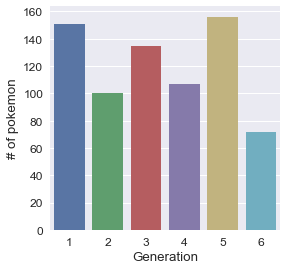

In [17]:
sns.factorplot(
    x='generation',
    data=pokedex,
    kind='count'
).set_axis_labels('Generation','# of pokemon')

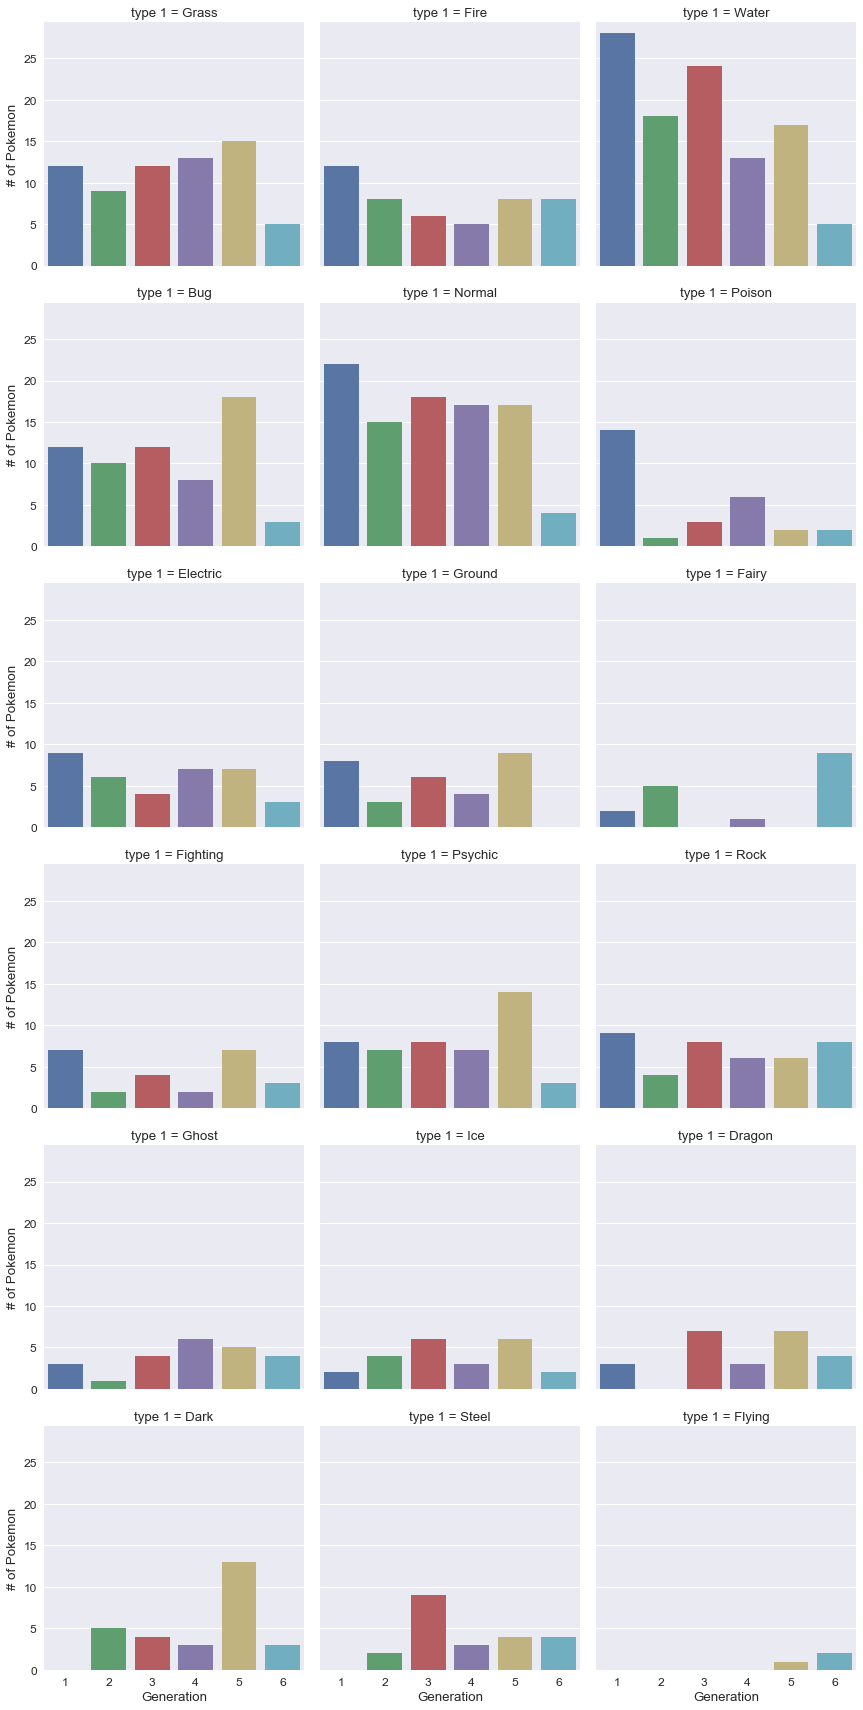

In [18]:
sns.factorplot(
    x='generation',
    data = pokedex,
    col = 'type 1',
    kind = 'count',
    col_wrap = 3
).set_axis_labels('Generation','# of Pokemon');

In [19]:
unique_type1 = np.setdiff1d(pokedex['type 1'],pokedex['type 2'])

unique_type2 = np.setdiff1d(pokedex['type 2'],pokedex['type 2'])

In [20]:
print('Unique type 1 : ',end=' ')
if unique_type1.size == 0:
    print('No unique types')
else:
    for u in unique_type1:
        print(u)
        
print('unique type 2 : ',end=' ')
if unique_type2.size==0:
    print('No Unique types')
else:
    for u in unique_type2:
        print(u)

Unique type 1 :  No unique types
unique type 2 :  No Unique types


In [21]:
type1,type2 = pokedex.groupby('type 1'),pokedex.groupby('type 2')

In [22]:
print('Type 1 count: {}'.format(len(type1)))
print('Type 2 count: {}'.format(len(type2)))


Type 1 count: 18
Type 2 count: 19


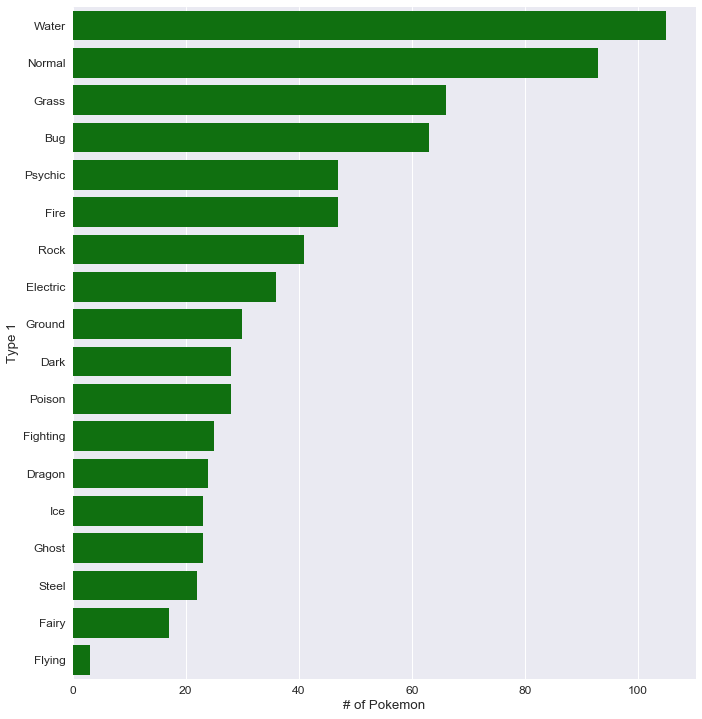

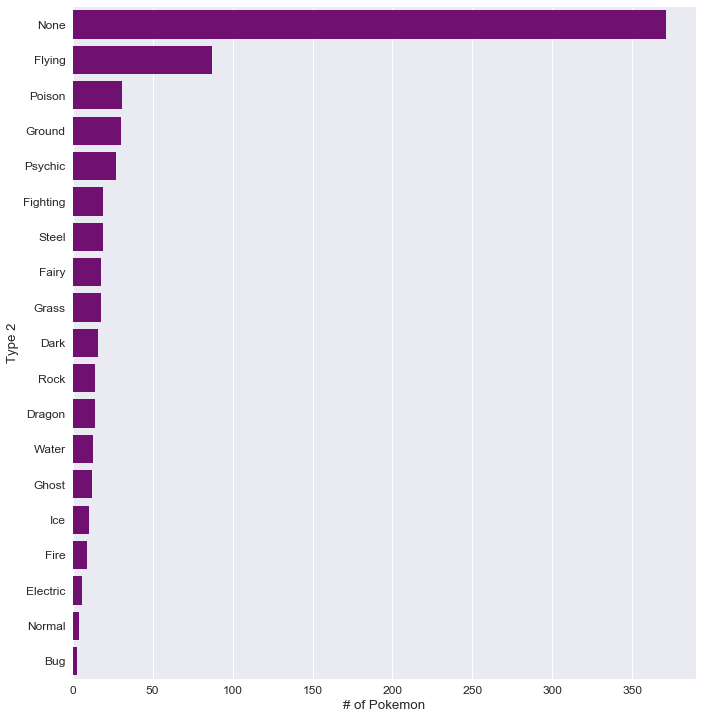

In [23]:
sns.factorplot(
    y = 'type 1',
    data = pokedex,
    kind = 'count',
    order = pokedex['type 1'].value_counts().index,
    color = 'green',
    size=10
).set_axis_labels('# of Pokemon','Type 1')

sns.factorplot(
    y = 'type 2',
    data = pokedex,
    kind = 'count',
    order = pokedex['type 2'].value_counts().index,
    color = 'purple',
    size=10
).set_axis_labels('# of Pokemon','Type 2')

In [24]:
dual_types = pokedex[pokedex['type 2']!= 'None']

In [25]:
dual_types.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False


In [26]:
dual_types.groupby(['type 1','type 2']).size().head(10)

type 1  type 2  
Bug     Electric     2
        Fighting     1
        Fire         2
        Flying      13
        Ghost        1
        Grass        6
        Ground       1
        Poison      11
        Rock         3
        Steel        5
dtype: int64

In [27]:
dual_types.groupby(['type 1','type 2']).size().unstack()

type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type 1,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,2.0,NaN,1.0,2.0,13.0,1.0,6.0,1.0,NaN,NaN,11.0,NaN,3.0,5.0,1.0
Dark,NaN,NaN,3.0,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
Dragon,NaN,NaN,NaN,1.0,NaN,NaN,1.0,4.0,NaN,NaN,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
Electric,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
Fire,NaN,NaN,NaN,NaN,NaN,6.0,NaN,5.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0
Flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,NaN,1.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


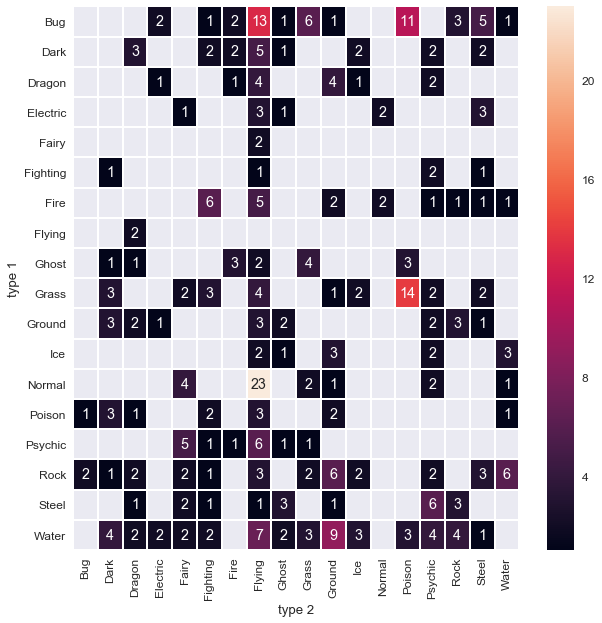

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(
    dual_types.groupby(['type 1','type 2']).size().unstack(),
    linewidths=1,
    annot = True,
)

In [29]:
single_types = pokedex[pokedex['type 2']=='None']

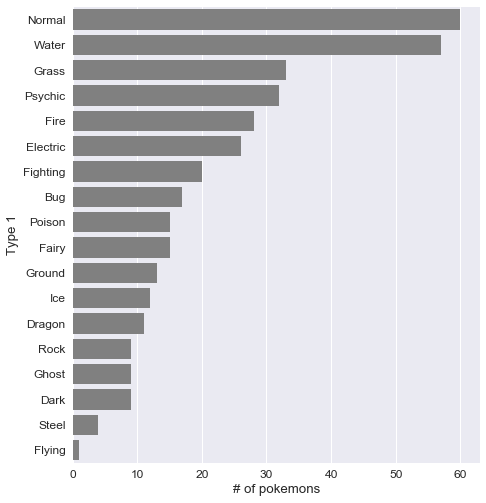

In [30]:
sns.factorplot(
    y = 'type 1',
    data = single_types,
    kind = 'count',
    order = single_types['type 1'].value_counts().index,
    size=7,
    color='grey'
).set_axis_labels('# of pokemons','Type 1')

In [31]:
pd.merge(
    pokedex,
    statistics,
    on='id'
).sort_values('total',ascending=False).head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,total
492,493,Arceus,Normal,None,4,True,120,120,120,120,120,120,720
643,644,Zekrom,Dragon,Electric,5,True,100,150,120,120,100,90,680
486,487,GiratinaAltered Forme,Ghost,Dragon,4,True,150,100,120,100,120,90,680
249,250,Ho-oh,Fire,Flying,2,True,106,130,90,110,154,90,680
248,249,Lugia,Psychic,Flying,2,True,106,90,130,90,154,110,680
483,484,Palkia,Water,Dragon,4,True,90,120,100,150,120,100,680
642,643,Reshiram,Dragon,Fire,5,True,100,120,100,150,120,90,680
482,483,Dialga,Steel,Dragon,4,True,100,120,120,150,100,90,680
716,717,Yveltal,Dark,Flying,6,True,126,131,95,131,98,99,680
149,150,Mewtwo,Psychic,None,1,True,106,110,90,154,90,130,680


In [32]:
std_stats = statistics.drop('total',axis='columns').set_index('id').apply(
lambda x: (x-x.mean())/x.std())

In [33]:
std_stats.head()

,hp,attack,defense,sp. atk,sp. def,speed
id,,,,,,
1,-0.904510,-0.898676,-0.743199,-0.133184,-0.155405,-0.759379
2,-0.324201,-0.451485,-0.263664,0.385873,0.402229,-0.209484
3,0.449545,0.236501,0.421387,1.077948,1.145741,0.523710
4,-1.136634,-0.795478,-0.948714,-0.306203,-0.713039,-0.026185
5,-0.401575,-0.382687,-0.434926,0.385873,-0.155405,0.523710


In [34]:
std_stats['strength'] = std_stats.sum(axis='columns')

In [35]:
std_stats.head()

,hp,attack,defense,sp. atk,sp. def,speed,strength
id,,,,,,,
1,-0.904510,-0.898676,-0.743199,-0.133184,-0.155405,-0.759379,-3.594354
2,-0.324201,-0.451485,-0.263664,0.385873,0.402229,-0.209484,-0.460732
3,0.449545,0.236501,0.421387,1.077948,1.145741,0.523710,3.854832
4,-1.136634,-0.795478,-0.948714,-0.306203,-0.713039,-0.026185,-3.926254
5,-0.401575,-0.382687,-0.434926,0.385873,-0.155405,0.523710,-0.465011


In [36]:
std_stats.reset_index(inplace=True)

In [37]:
pd.merge(
    pokedex,
    std_stats,
    on='id'
).sort_values('strength',ascending=False).head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,strength
492,493,Arceus,Normal,None,4,True,1.997038,1.543676,1.688730,1.770023,1.889253,1.990097,10.878816
486,487,GiratinaAltered Forme,Ghost,Dragon,4,True,3.157657,0.855689,1.688730,1.077948,1.889253,0.890307,9.559583
248,249,Lugia,Psychic,Flying,2,True,1.455415,0.511696,2.031255,0.731910,3.153223,1.623500,9.507000
249,250,Ho-oh,Fire,Flying,2,True,1.455415,1.887669,0.661154,1.423986,3.153223,0.890307,9.471754
715,716,Xerneas,Fairy,None,6,True,2.229161,1.922068,0.832417,2.150665,1.071389,1.220244,9.425945
716,717,Yveltal,Dark,Flying,6,True,2.229161,1.922068,0.832417,2.150665,1.071389,1.220244,9.425945
149,150,Mewtwo,Psychic,None,1,True,1.455415,1.199683,0.661154,2.946551,0.773985,2.356694,9.393482
642,643,Reshiram,Dragon,Fire,5,True,1.223292,1.543676,1.003679,2.808136,1.889253,0.890307,9.358342
483,484,Palkia,Water,Dragon,4,True,0.836418,1.543676,1.003679,2.808136,1.889253,1.256904,9.338066
383,384,Rayquaza,Dragon,Flying,3,True,1.416728,2.575656,0.661154,2.808136,0.773985,1.073605,9.309264


In [38]:
pd.merge(
    pokedex,
    std_stats,
    on='id'
).sort_values('strength').head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,strength
190,191,Sunkern,Grass,None,2,False,-1.484820,-1.552264,-1.393996,-1.344315,-1.456551,-1.309275,-8.541221
297,298,Azurill,Normal,Fairy,3,False,-0.711074,-1.896257,-1.051471,-1.690353,-1.084795,-1.675871,-8.109822
400,401,Kricketot,Bug,None,4,False,-1.214009,-1.724260,-1.017219,-1.517334,-1.047620,-1.492573,-8.013015
264,265,Wurmple,Bug,None,3,False,-0.904510,-1.036274,-1.222734,-1.690353,-1.456551,-1.675871,-7.986294
12,13,Weedle,Bug,Poison,1,False,-1.097947,-1.380267,-1.393996,-1.690353,-1.828307,-0.576081,-7.966952
9,10,Caterpie,Bug,None,1,False,-0.904510,-1.552264,-1.222734,-1.690353,-1.828307,-0.759379,-7.957548
279,280,Ralts,Psychic,Fairy,3,False,-1.562194,-1.724260,-1.565259,-0.825259,-1.270673,-0.942678,-7.890324
663,664,Scatterbug,Bug,None,6,False,-1.175321,-1.380267,-1.051471,-1.448127,-1.642429,-1.125976,-7.823592
128,129,Magikarp,Water,None,1,False,-1.871693,-2.240250,-0.537684,-1.863372,-1.828307,0.523710,-7.817596
348,349,Feebas,Water,None,3,False,-1.871693,-2.068254,-1.736521,-2.036391,-0.527161,0.523710,-7.716310


In [39]:
pd.merge(
    pokedex[~pokedex['legendary']],
    std_stats,
    on='id'
).sort_values('strength',ascending=False).head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,strength
279,289,Slaking,Normal,None,3,False,3.157657,2.919649,1.003679,0.904929,-0.155405,1.256904,9.087412
460,488,Cresselia,Psychic,None,4,False,1.997038,-0.176291,1.688730,0.212854,2.261009,0.707008,6.690347
607,648,MeloettaAria Forme,Normal,Psychic,5,False,1.223292,0.064505,0.215872,2.046853,2.186657,0.890307,6.627485
665,706,Goodra,Dragon,None,6,False,0.836418,0.855689,-0.023896,1.423986,3.004521,0.523710,6.620428
241,251,Celebi,Psychic,Grass,2,False,1.223292,0.855689,1.003679,1.077948,1.145741,1.256904,6.563252
146,151,Mew,Psychic,None,1,False,1.223292,0.855689,1.003679,1.077948,1.145741,1.256904,6.563252
462,490,Manaphy,Water,None,4,False,1.223292,0.855689,1.003679,1.077948,1.145741,1.256904,6.563252
425,445,Garchomp,Dragon,Ground,4,False,1.532790,1.887669,0.832417,0.385873,0.588107,1.330223,6.557078
603,635,Hydreigon,Dark,Dragon,5,False,0.913793,1.027686,0.661154,1.943042,0.773985,1.183584,6.503244
363,373,Salamence,Dragon,Flying,3,False,1.029855,2.059666,0.318629,1.423986,0.402229,1.256904,6.491268


In [40]:
joined = pd.merge(
    pokedex,
    std_stats,
    on='id'
)

In [41]:
medians = joined.groupby(['type 1','type 2']).median().loc[:,'strength']

In [42]:
medians.head(10)

type 1  type 2  
Bug     Electric   -0.796472
        Fighting    2.981178
        Fire        1.350317
        Flying     -0.182361
        Ghost      -6.718809
        Grass      -0.964033
        Ground     -5.564797
        None       -6.931972
        Poison     -2.140085
        Rock        1.930145
Name: strength, dtype: float64

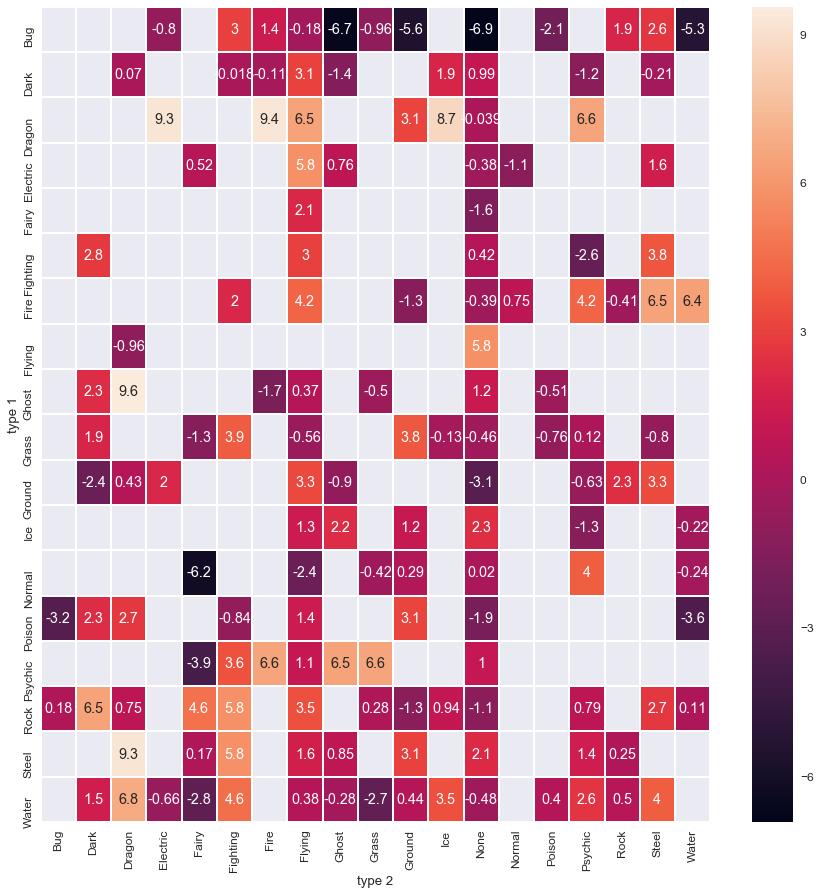

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(
    medians.unstack(),
    linewidths=1,
    annot = True
)

In [44]:
medians.reset_index().sort_values('strength', ascending=False).head()

,type 1,type 2,strength
53,Ghost,Dragon,9.559583
22,Dragon,Fire,9.358342
119,Steel,Dragon,9.299880
21,Dragon,Electric,9.293747
25,Dragon,Ice,8.702948


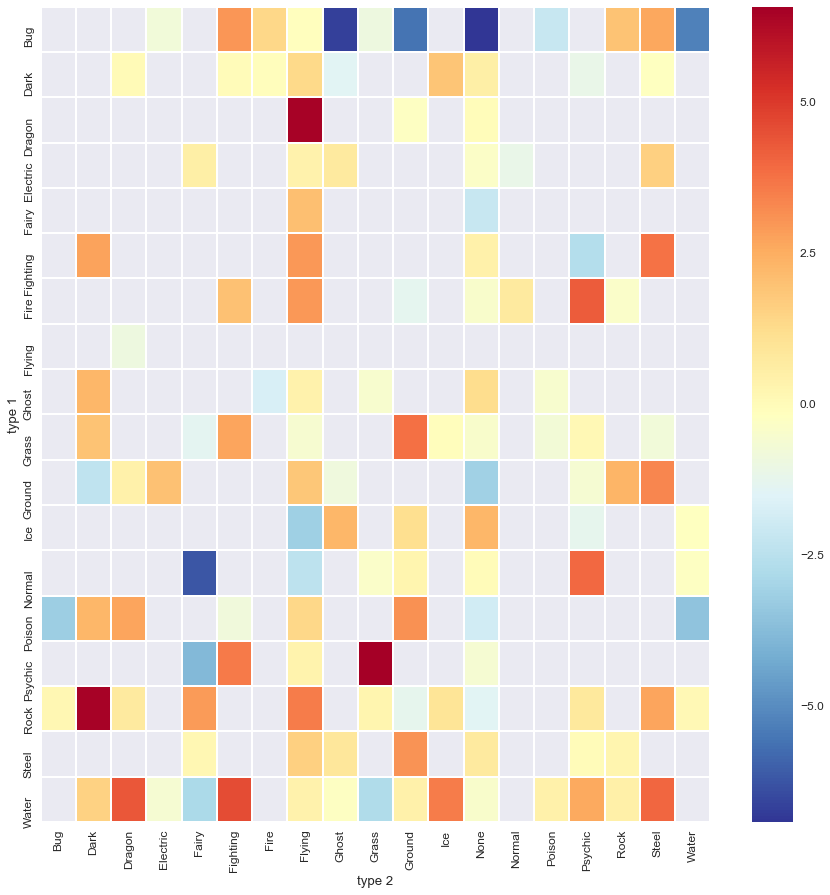

In [45]:
plt.figure(figsize=(15,15))
joined_nolegs = pd.merge(
    pokedex[~pokedex['legendary']],
    std_stats,
    on='id'
)

medians = joined_nolegs.groupby(['type 1', 
                                 'type 2']).median().loc[:,'strength']

sns.heatmap(
    medians.unstack(),
    linewidths=1,
    cmap='RdYlBu_r'
);

In [46]:
medians.reset_index().sort_values('strength', ascending=False).head()

,type 1,type 2,strength
94,Psychic,Grass,6.563252
21,Dragon,Flying,6.480187
97,Rock,Dark,6.472608
119,Water,Fighting,4.578926
116,Water,Dragon,4.344018


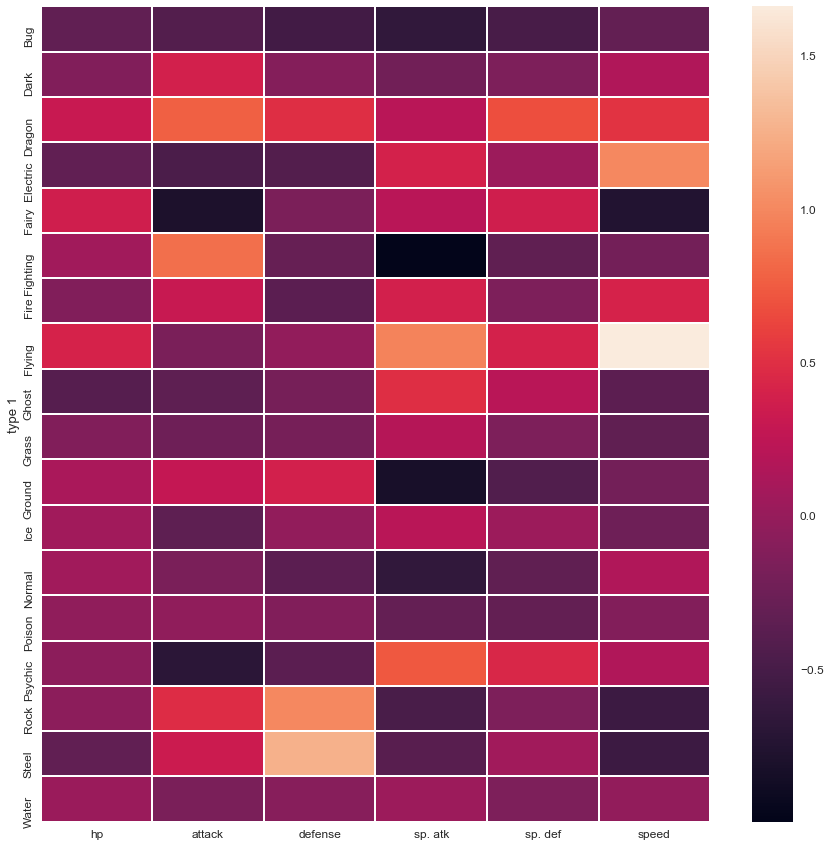

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(
    joined.groupby('type 1').median().loc[:,'hp':'speed'],
    linewidth=1
)

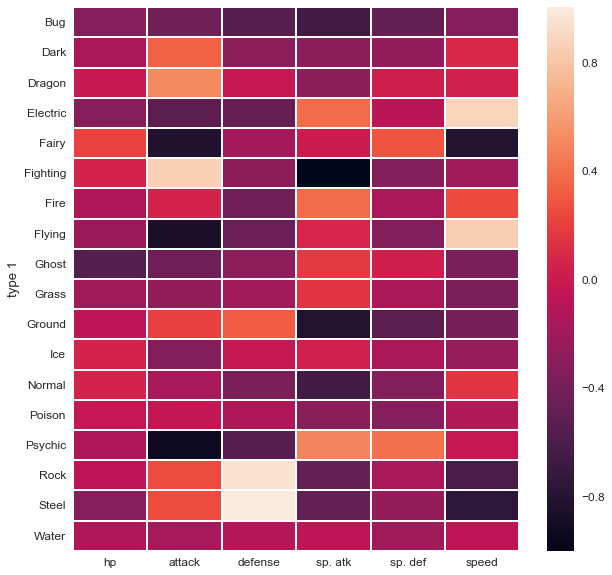

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(
    joined_nolegs.groupby('type 1').median().loc[:,'hp':'speed'],
    linewidth=1
)

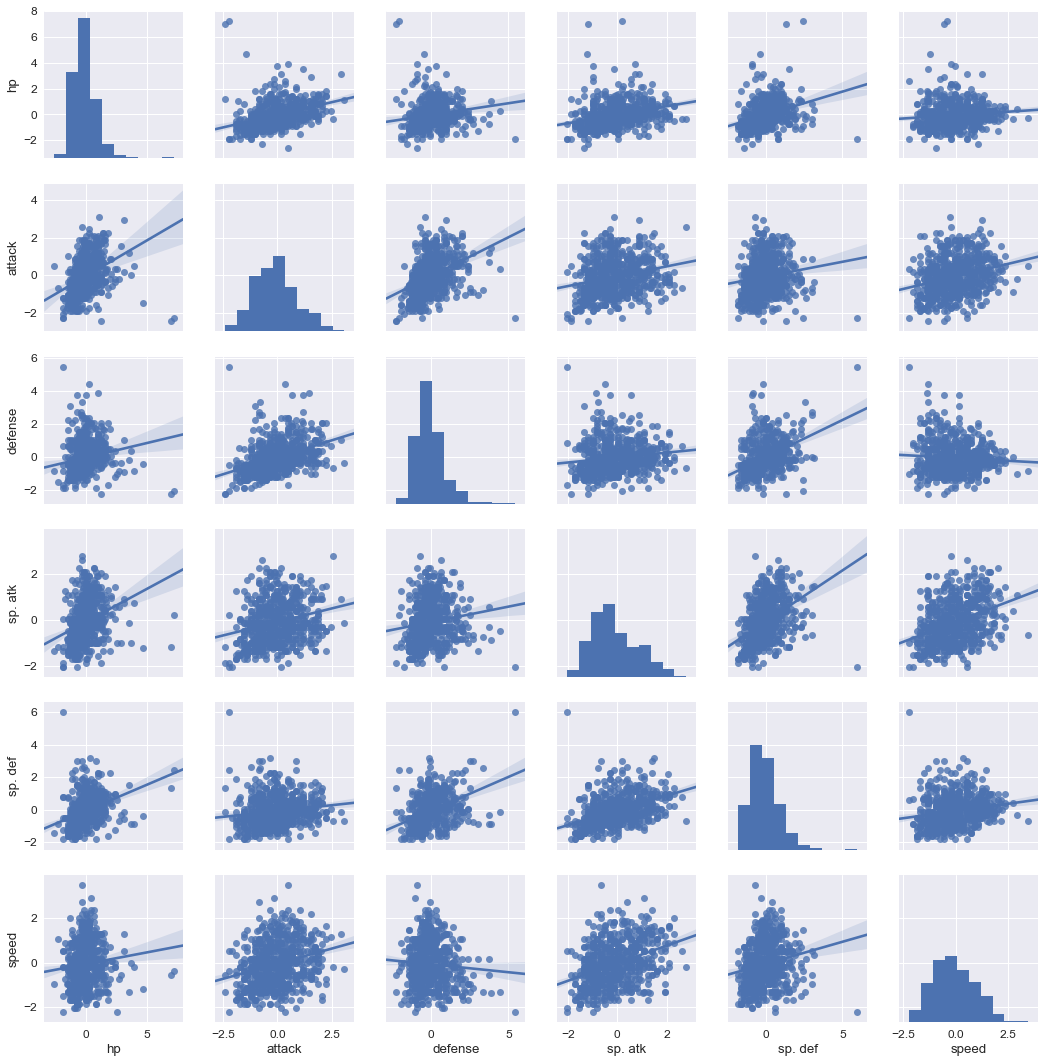

In [53]:
plt.figure(figsize=(15,15))
sns.pairplot(
    data=joined_nolegs.loc[:, 'hp':'speed'],
    kind='reg'
)